In [31]:
from imageVAE import *
from dataset_helper import *
import os
import matplotlib.pyplot as plt
import random as rd

In [32]:
dim = (256,256,3)
latentDim = 1000
stride = 2
arch = [64,128,128,128,128]

archRev = list(arch)
archRev.reverse()
vae = ImageVAE(dim,arch,archRev,latent_dim=latentDim,stride=stride)


(256, 256, 3)
Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 128, 128, 64) 1728        input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 64, 64, 128)  73728       conv2d_10[0][0]                  
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 32, 32, 128)  147456      conv2d_11[0][0]                  
______________________________________________________________________________

In [33]:
vae.load_weights("../models/skyline_vae_100_3")

In [34]:
names = ["../data/skyline_images/" + x for x in os.listdir("../data/skyline_images/") if ".jpg" in x]

In [35]:
tensor = getTrainingTensor(names,dim)


In [36]:
vae.fit_image_generator(tensor)

In [39]:
x = 0
for image in vae.generate_images(1000):
    x += 1
    #plt.figure()
    #image = enhanceImage(image)
    #plt.imshow(image)
    saveImage(image,"../data/generated_skyline_images/generated_image_enh_" + str(x) + ".jpg")
    #image = image * 255

                             _              _                           
  _ __   ___ _   _ _ __ __ _| |   ___ _ __ | |__   __ _ _ __   ___ ___  
 | '_ \ / _ \ | | | '__/ _` | |  / _ \ '_ \| '_ \ / _` | '_ \ / __/ _ \ 
 | | | |  __/ |_| | | | (_| | | |  __/ | | | | | | (_| | | | | (_|  __/ 
 |_| |_|\___|\__,_|_|  \__,_|_|  \___|_| |_|_| |_|\__,_|_| |_|\___\___| 

Super Resolution for images and videos powered by Deep Learning!
  - Code licensed as AGPLv3, models under CC BY-NC-SA.
  - Using the device `cpu` for neural computation.

Enhancing 1 image(s) specified on the command-line.
  - Loaded file `ne2x-photo-default-0.3.pkl.bz2` with trained model.

6bd00c44-eb68-11eb-b70a-acde48001122.jpg ................

enhanced 2x
                             _              _                           
  _ __   ___ _   _ _ __ __ _| |   ___ _ __ | |__   __ _ _ __   ___ ___  
 | '_ \ / _ \ | | | '__/ _` | |  / _ \ '_ \| '_ \ / _` | '_ \ / __/ _ \ 
 | | | |  __/ |_| | | | (_| | | |  __/ | | | | | |

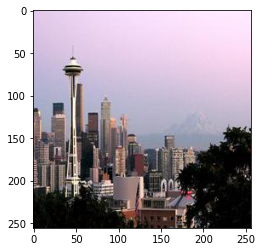

<Figure size 432x288 with 0 Axes>

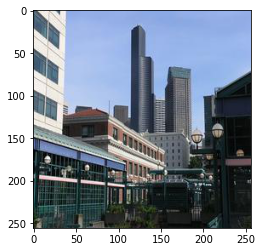

<Figure size 432x288 with 0 Axes>

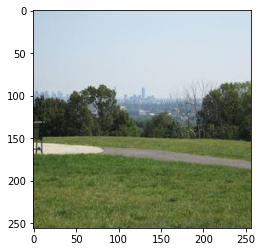

<Figure size 432x288 with 0 Axes>

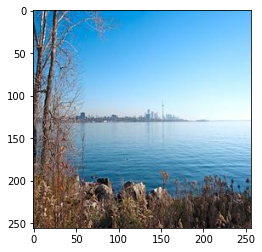

<Figure size 432x288 with 0 Axes>

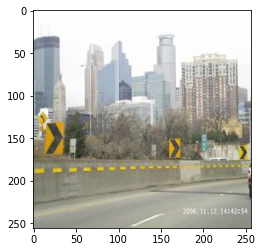

<Figure size 432x288 with 0 Axes>

In [22]:
i = 0
for image in tensor[:5]:
    plt.figure()
    plt.imshow(image)
    plt.figure()
    generatedImage = enhanceImage(vae.encode_decode(np.array([image]))[0])
    saveImage(generatedImage,"../data/generated_skyline_images/genImageEnh" + str(i) + ".jpg")
    i += 1

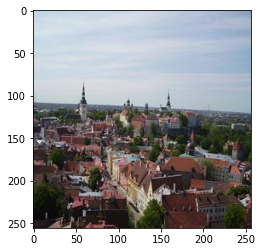

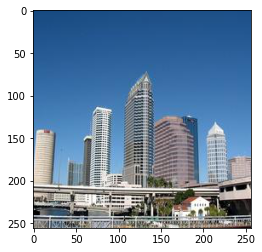

In [17]:
randomImageSelect = rd.sample(list(range(len(tensor))),k=2)
for i in randomImageSelect:
    plt.figure()
    plt.imshow(tensor[i])

In [18]:
_,_,latentImages = vae.encoder.predict(tensor[randomImageSelect])

                             _              _                           
  _ __   ___ _   _ _ __ __ _| |   ___ _ __ | |__   __ _ _ __   ___ ___  
 | '_ \ / _ \ | | | '__/ _` | |  / _ \ '_ \| '_ \ / _` | '_ \ / __/ _ \ 
 | | | |  __/ |_| | | | (_| | | |  __/ | | | | | | (_| | | | | (_|  __/ 
 |_| |_|\___|\__,_|_|  \__,_|_|  \___|_| |_|_| |_|\__,_|_| |_|\___\___| 

Super Resolution for images and videos powered by Deep Learning!
  - Code licensed as AGPLv3, models under CC BY-NC-SA.
  - Using the device `cpu` for neural computation.

Enhancing 1 image(s) specified on the command-line.
  - Loaded file `ne2x-photo-default-0.3.pkl.bz2` with trained model.

34781b16-eb67-11eb-b70a-acde48001122.jpg ................

enhanced 2x


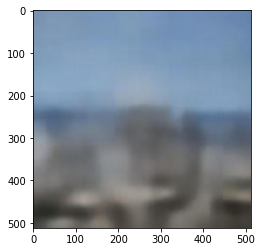

In [20]:
mergeImage = vae.decoder.predict(np.array([np.mean(latentImages,axis=0)]))[0]
plt.imshow(enhanceImage(mergeImage))

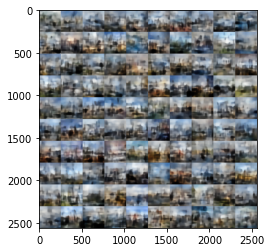

In [26]:
n=10
mosiac = np.zeros((n*dim[0],n*dim[1],dim[2]))
for x in range(n):
    for y in range(n):
        mosiac[x*dim[0]:(x+1)*dim[0],y*dim[1]:(y+1)*dim[0],:] = vae.generate_images(1)[0]
plt.imshow(mosiac)

In [27]:
saveImage(mosiac,"../data/generated_skyline_images/random_mosiac.jpg")
